In [1]:
import os,sys
import pandas as pd
from PyComplexHeatmap import *
from scipy import stats
import numpy as np

In [2]:
outdir="plot"
if not os.path.exists(outdir):
    os.mkdir(outdir)

## Load data

In [3]:
summary=pd.read_csv("coloc_results.tsv",sep='\t',index_col=0)
summary=summary.loc[summary.PP4 >= 0.5]
summary

,snp,chrom,position,MAF,dmr_id,pvalues,phe2,pvalue2,snp2,n_snps,...,Name,file,beta2,varbeta2,pvalues2,trait_description,ontology_mapping,sample_size,n_case,n_control
dmr938063,rs34950321,chr5,76668682.0,0.3430,dmr938063,9.025980e-35,GCST90002361,1.181338e-31,rs34950321,23.0,...,Monocyte,Monocyte.quant.no_beta.txt,NaN,NaN,NaN,Platelet count,EFO_0004309,721201.0,NaN,NaN
dmr846958,rs2606736,chr3,11358775.0,0.5000,dmr846958,9.523610e-25,GCST90000064,5.500000e-15,rs2606736,1.0,...,Th-Naive,Th-Naive.quant.no_beta.txt,NaN,NaN,NaN,Hypertension,EFO_0000537,810865.0,NaN,NaN
dmr1668545,rs2606736,chr3,11358775.0,0.5000,dmr1668545,3.502970e-21,GCST90000064,5.500000e-15,rs2606736,1.0,...,Tc-Mem,Tc-Mem.quant.no_beta.txt,NaN,NaN,NaN,Hypertension,EFO_0000537,810865.0,NaN,NaN
dmr552486,rs112802399,chr17,78134906.0,0.5000,dmr552486,2.955510e-20,GCST90002372,1.418213e-13,rs112802399,1.0,...,Tc-Naive,Tc-Naive.quant.no_beta.txt,NaN,NaN,NaN,Red cell distribution width,EFO_0005192,563352.0,NaN,NaN
dmr759136,rs2606736,chr3,11358775.0,0.5000,dmr759136,1.350330e-19,GCST90000064,5.500000e-15,rs2606736,1.0,...,Th-Mem,Th-Mem.quant.no_beta.txt,NaN,NaN,NaN,Hypertension,EFO_0000537,810865.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dmr2659510,rs144044117,chr8,118907319.0,0.4945,dmr2659510,1.021300e-04,GCST90002302,3.025296e-11,rs144044117,8.0,...,Tc-Mem,Tc-Mem.quant.no_beta.txt,NaN,NaN,NaN,Eosinophil counts,EFO_0004842,583850.0,NaN,NaN
dmr393357,rs341376,chr15,60823522.0,0.0055,dmr393357,1.566010e-13,GCST90002302,1.637049e-09,rs341376,8.0,...,Th-Mem,Th-Mem.quant.no_beta.txt,NaN,NaN,NaN,Eosinophil counts,EFO_0004842,583850.0,NaN,NaN
dmr2237947,rs16891725,chr6,26478922.0,0.4825,dmr2237947,7.215330e-04,GCST90011871,3.226000e-47,rs16891725,7.0,...,Tc-Mem,Tc-Mem.cc.no_beta.txt,NaN,NaN,NaN,Addison's disease,Orphanet_101960,5320.0,1223.0,4097.0
dmr598608,rs12981369,chr19,1066929.0,0.4950,dmr598608,9.564540e-05,GCST90002372,2.427612e-12,rs12981369,8.0,...,Tc-Naive,Tc-Naive.quant.no_beta.txt,NaN,NaN,NaN,Red cell distribution width,EFO_0005192,563352.0,NaN,NaN


In [4]:
# load gwas_id and snp
outfile=os.path.join(outdir,"gwas_snp.tsv")
if not os.path.exists(outfile):
    R=[]
    for infile in os.listdir("gwas_catalog"):
        if not infile.startswith('gwas_catalog') or not infile.endswith('.tsv.gz'):
            continue
        print(infile)
        df=pd.read_csv(os.path.join("gwas_catalog",infile),sep='\t',usecols=['gwas_id','snp'])
        df=df.drop_duplicates()
        R.append(df)

    df1=pd.concat(R)
    df1=df1.loc[df1.gwas_id.isin(summary.phe2.tolist())]
    df1=df1.groupby("gwas_id").snp.apply(lambda x:x.unique().tolist())
    df1.reset_index().to_csv(outfile,sep='\t',index=False)
df1=pd.read_csv(outfile,sep='\t')
df1.snp=df1.snp.apply(eval)
df1.set_index('gwas_id',inplace=True)
df1=df1.loc[summary.phe2.unique().tolist()]
df1

,snp
gwas_id,
GCST90002361,"[rs150672738, rs139490379, rs7546283, rs143135..."
GCST90000064,"[rs2493292, rs880315, rs12046278, rs35737219, ..."
GCST90002372,"[rs9429742, rs9429544, rs71662879, rs67882944,..."
GCST90296614,"[rs2809932, rs2783184, rs2783189, rs2809953, r..."
GCST90002344,"[rs1237370, rs72730151, rs10875300, rs28364907..."
...,...
GCST90019482,"[rs4665972, rs1260326, rs6547692, rs780096, rs..."
GCST90079688,"[rs72878024, rs1800057, rs74911261]"
GCST90161500,"[rs4299259, rs76313614, rs35666157, rs11667107..."


In [27]:
# load dmr and snp
outfile=os.path.join(outdir,"dmr_snp.tsv")
if not os.path.exists(outfile):
    R=[]
    for infile in os.listdir("cis-meQTL-norminal"):
        if not infile.endswith('.tsv'):
            continue
        print(infile)
        df=pd.read_csv(os.path.join("cis-meQTL-norminal",infile),sep='\t',usecols=[2,3],header=None) #'chrom','position','dmr_id','snp','MAF','pvalues'
        df.columns=['dmr','snp']
        df=df.drop_duplicates()
        df=df.loc[df.dmr.isin(summary.dmr_id.tolist())]
        R.append(df)

    df2=pd.concat(R)
    df2=df2.groupby("dmr").snp.apply(lambda x:x.unique().tolist())
    df2.reset_index().to_csv(outfile,sep='\t',index=False)
df2=pd.read_csv(outfile,sep='\t')
df2.snp=df2.snp.apply(eval)
df2.set_index('dmr',inplace=True)
df2=df2.loc[summary.dmr_id.unique().tolist()]
df2

,snp
dmr,
dmr938063,"[rs113102341, rs538836503, rs372632674, rs1458..."
dmr846958,"[rs114600030, rs201956453, rs11916680, rs72624..."
dmr1668545,"[rs77939847, rs145480444, rs150408843, rs42344..."
dmr552486,"[rs111608333, rs73996394, rs114692358, rs11373..."
dmr759136,"[rs80184122, rs111668167, rs113682309, rs61083..."
...,...
dmr2659510,"[rs11562826, rs11562777, rs10955842, rs1156266..."
dmr393357,"[rs1256092, rs200906645, rs10690207, rs1289405..."
dmr2237947,"[rs113944636, rs9358795, rs111272758, rs189747..."


## Chi2 square test

In [28]:
df1.shape,df2.shape,summary.phe2.nunique(),summary.dmr_id.nunique()

((92, 1), (17744, 1), 92, 17744)

In [29]:
all_snps=set()
for snp_list in df1.snp.values:
    for snp in snp_list:
        if snp not in all_snps:
            all_snps.add(snp)
print(len(set(all_snps)))
for snp_list in df2.snp.values:
    for snp in snp_list:
        if snp not in all_snps:
            all_snps.add(snp)
N=len(set(all_snps))
print(N)

613419
5570782


In [30]:
D1=df1.snp.apply(lambda x:set([snp for snp in x if snp!='.'])).to_dict()
D2=df2.snp.apply(lambda x:set([snp for snp in x if snp!='.'])).to_dict()

In [31]:
summary.head()

,snp,chrom,position,MAF,dmr_id,pvalues,phe2,pvalue2,snp2,n_snps,...,Name,file,beta2,varbeta2,pvalues2,trait_description,ontology_mapping,sample_size,n_case,n_control
dmr938063,rs34950321,chr5,76668682.0,0.343,dmr938063,9.025980e-35,GCST90002361,1.181338e-31,rs34950321,23.0,...,Monocyte,Monocyte.quant.no_beta.txt,NaN,NaN,NaN,Platelet count,EFO_0004309,721201.0,NaN,NaN
dmr846958,rs2606736,chr3,11358775.0,0.500,dmr846958,9.523610e-25,GCST90000064,5.500000e-15,rs2606736,1.0,...,Th-Naive,Th-Naive.quant.no_beta.txt,NaN,NaN,NaN,Hypertension,EFO_0000537,810865.0,NaN,NaN
dmr1668545,rs2606736,chr3,11358775.0,0.500,dmr1668545,3.502970e-21,GCST90000064,5.500000e-15,rs2606736,1.0,...,Tc-Mem,Tc-Mem.quant.no_beta.txt,NaN,NaN,NaN,Hypertension,EFO_0000537,810865.0,NaN,NaN
dmr552486,rs112802399,chr17,78134906.0,0.500,dmr552486,2.955510e-20,GCST90002372,1.418213e-13,rs112802399,1.0,...,Tc-Naive,Tc-Naive.quant.no_beta.txt,NaN,NaN,NaN,Red cell distribution width,EFO_0005192,563352.0,NaN,NaN
dmr759136,rs2606736,chr3,11358775.0,0.500,dmr759136,1.350330e-19,GCST90000064,5.500000e-15,rs2606736,1.0,...,Th-Mem,Th-Mem.quant.no_beta.txt,NaN,NaN,NaN,Hypertension,EFO_0000537,810865.0,NaN,NaN


In [37]:
def cal_a(gwas,dmr):
    return len(D1[gwas].intersection(D2[dmr]))

def cal_b(gwas,dmr):
    return len(D1[gwas].difference(D2[dmr]))

def cal_c(gwas,dmr):
    return len(D2[dmr].difference(D1[gwas]))

In [39]:
# chi2_contingency table ([[a,b],[c,d]])
summary['a']=summary.apply(lambda x:cal_a(x.phe2,x.dmr_id),axis=1)
summary['b']=summary.apply(lambda x:cal_b(x.phe2,x.dmr_id),axis=1)
summary['c']=summary.apply(lambda x:cal_c(x.phe2,x.dmr_id),axis=1)
summary['d']=summary.apply(lambda x:N-(x.a+x.b+x.c),axis=1)

In [40]:
summary.head()

,snp,chrom,position,MAF,dmr_id,pvalues,phe2,pvalue2,snp2,n_snps,...,pvalues2,trait_description,ontology_mapping,sample_size,n_case,n_control,a,b,c,d
dmr938063,rs34950321,chr5,76668682.0,0.343,dmr938063,9.025980e-35,GCST90002361,1.181338e-31,rs34950321,23.0,...,NaN,Platelet count,EFO_0004309,721201.0,NaN,NaN,23,116266,885,5453608
dmr846958,rs2606736,chr3,11358775.0,0.500,dmr846958,9.523610e-25,GCST90000064,5.500000e-15,rs2606736,1.0,...,NaN,Hypertension,EFO_0000537,810865.0,NaN,NaN,1,518,901,5569362
dmr1668545,rs2606736,chr3,11358775.0,0.500,dmr1668545,3.502970e-21,GCST90000064,5.500000e-15,rs2606736,1.0,...,NaN,Hypertension,EFO_0000537,810865.0,NaN,NaN,1,518,662,5569601
dmr552486,rs112802399,chr17,78134906.0,0.500,dmr552486,2.955510e-20,GCST90002372,1.418213e-13,rs112802399,1.0,...,NaN,Red cell distribution width,EFO_0005192,563352.0,NaN,NaN,1,87610,734,5482437
dmr759136,rs2606736,chr3,11358775.0,0.500,dmr759136,1.350330e-19,GCST90000064,5.500000e-15,rs2606736,1.0,...,NaN,Hypertension,EFO_0000537,810865.0,NaN,NaN,1,518,751,5569512


In [50]:
def chi2_test(a,b,c,d):
    r=stats.chi2_contingency([[a,b],[c,d]])
    return tuple([r.statistic,r.pvalue])

In [52]:
summary['chi2']=summary.apply(lambda x:chi2_test(x.a,x.b,x.c,x.d),axis=1)
summary['chi2_statistic']=summary['chi2'].apply(lambda x:x[0])
summary['chi2_pval']=summary['chi2'].apply(lambda x:x[1])
summary

,snp,chrom,position,MAF,dmr_id,pvalues,phe2,pvalue2,snp2,n_snps,...,sample_size,n_case,n_control,a,b,c,d,chi2,chi2_statistic,chi2_pval
dmr938063,rs34950321,chr5,76668682.0,0.3430,dmr938063,9.025980e-35,GCST90002361,1.181338e-31,rs34950321,23.0,...,721201.0,NaN,NaN,23,116266,885,5453608,"(0.6775200015521757, 0.4104420129180699)",0.677520,4.104420e-01
dmr846958,rs2606736,chr3,11358775.0,0.5000,dmr846958,9.523610e-25,GCST90000064,5.500000e-15,rs2606736,1.0,...,810865.0,NaN,NaN,1,518,901,5569362,"(2.059527687981426, 0.15125704725063488)",2.059528,1.512570e-01
dmr1668545,rs2606736,chr3,11358775.0,0.5000,dmr1668545,3.502970e-21,GCST90000064,5.500000e-15,rs2606736,1.0,...,810865.0,NaN,NaN,1,518,662,5569601,"(3.10982013043914, 0.07782155424865556)",3.109820,7.782155e-02
dmr552486,rs112802399,chr17,78134906.0,0.5000,dmr552486,2.955510e-20,GCST90002372,1.418213e-13,rs112802399,1.0,...,563352.0,NaN,NaN,1,87610,734,5482437,"(8.894948275864714, 0.0028596070584750903)",8.894948,2.859607e-03
dmr759136,rs2606736,chr3,11358775.0,0.5000,dmr759136,1.350330e-19,GCST90000064,5.500000e-15,rs2606736,1.0,...,810865.0,NaN,NaN,1,518,751,5569512,"(2.6390408911118306, 0.10426647292513654)",2.639041,1.042665e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dmr2659510,rs144044117,chr8,118907319.0,0.4945,dmr2659510,1.021300e-04,GCST90002302,3.025296e-11,rs144044117,8.0,...,583850.0,NaN,NaN,8,89292,64,5481418,"(35.45957970086681, 2.603985330467621e-09)",35.459580,2.603985e-09
dmr393357,rs341376,chr15,60823522.0,0.0055,dmr393357,1.566010e-13,GCST90002302,1.637049e-09,rs341376,8.0,...,583850.0,NaN,NaN,8,89292,746,5480736,"(1.0818149933256724, 0.2982918841811927)",1.081815,2.982919e-01
dmr2237947,rs16891725,chr6,26478922.0,0.4825,dmr2237947,7.215330e-04,GCST90011871,3.226000e-47,rs16891725,7.0,...,5320.0,1223.0,4097.0,10,16905,40,5553827,"(577.3683563518737, 1.4012609226762364e-127)",577.368356,1.401261e-127
dmr598608,rs12981369,chr19,1066929.0,0.4950,dmr598608,9.564540e-05,GCST90002372,2.427612e-12,rs12981369,8.0,...,563352.0,NaN,NaN,12,87599,166,5483005,"(27.47487830822644, 1.591483773070796e-07)",27.474878,1.591484e-07


In [55]:
from statsmodels.sandbox.stats.multicomp import multipletests
summary['chi2_adjp']=multipletests(summary.chi2_pval.values,method='fdr_bh')[1]
summary.sort_values('chi2_adjp',ascending=True,inplace=True)
summary.to_csv(os.path.join(outdir,"chi2_test_results.tsv"),sep='\t')
summary

,snp,chrom,position,MAF,dmr_id,pvalues,phe2,pvalue2,snp2,n_snps,...,n_case,n_control,a,b,c,d,chi2,chi2_statistic,chi2_pval,chi2_adjp
dmr140734,rs75309334,chr10,73461755.0,0.5000,dmr140734,4.033280e-20,GCST90278670,NaN,rs75309334,725.0,...,NaN,NaN,725,10972,505,5558580,"(202264.78909914757, 0.0)",202264.789099,0.0,0.0
dmr1394906,rs11999532,chr9,136476953.0,0.0025,dmr1394906,2.362080e-13,GCST90002302,1.092001e-19,rs11999532,66.0,...,NaN,NaN,109,89191,229,5481253,"(1993.2273291567233, 0.0)",1993.227329,0.0,0.0
dmr2104821,rs2652202,chr5,77799324.0,0.4990,dmr2104821,9.719730e-14,GCST90002361,1.049591e-16,rs2652202,98.0,...,NaN,NaN,125,116164,102,5454391,"(3091.4697921132665, 0.0)",3091.469792,0.0,0.0
dmr772164,rs147921170,chr20,30345610.0,0.5000,dmr772164,5.786130e-07,GCST90002361,1.100189e-19,rs147921170,139.0,...,NaN,NaN,139,116150,248,5454245,"(2150.5847163617327, 0.0)",2150.584716,0.0,0.0
dmr623553,rs7248577,chr19,38718155.0,0.5000,dmr623553,3.606180e-11,GCST90002361,1.135734e-41,rs7248577,255.0,...,NaN,NaN,266,116023,917,5453576,"(2398.7123224657357, 0.0)",2398.712322,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dmr2669689,rs118094638,chr8,129692212.0,0.4950,dmr2669689,5.906450e-04,GCST90002344,7.485393e-17,rs118094638,5.0,...,NaN,NaN,5,88984,288,5481505,"(0.0, 1.0)",0.000000,1.0,1.0
dmr1530587,rs34329220,chr20,32353700.0,0.5000,dmr1530587,2.841300e-05,GCST90002344,8.201809e-24,rs34329220,1.0,...,NaN,NaN,1,88988,91,5481702,"(0.0, 1.0)",0.000000,1.0,1.0
dmr1414907,rs150568624,chr2,159833748.0,0.5000,dmr1414907,1.563360e-06,GCST90002361,2.169080e-10,rs150568624,1.0,...,NaN,NaN,1,116288,62,5454431,"(0.0, 1.0)",0.000000,1.0,1.0
dmr549733,rs80236111,chr19,19287931.0,0.5000,dmr549733,3.613290e-05,GCST90002361,2.493783e-29,rs80236111,5.0,...,NaN,NaN,5,116284,213,5454280,"(0.0, 1.0)",0.000000,1.0,1.0


In [57]:
summary.loc[summary.chi2_adjp<=0.01]

,snp,chrom,position,MAF,dmr_id,pvalues,phe2,pvalue2,snp2,n_snps,...,n_case,n_control,a,b,c,d,chi2,chi2_statistic,chi2_pval,chi2_adjp
dmr140734,rs75309334,chr10,73461755.0,0.5000,dmr140734,4.033280e-20,GCST90278670,NaN,rs75309334,725.0,...,NaN,NaN,725,10972,505,5558580,"(202264.78909914757, 0.0)",202264.789099,0.000000,0.000000
dmr1394906,rs11999532,chr9,136476953.0,0.0025,dmr1394906,2.362080e-13,GCST90002302,1.092001e-19,rs11999532,66.0,...,NaN,NaN,109,89191,229,5481253,"(1993.2273291567233, 0.0)",1993.227329,0.000000,0.000000
dmr2104821,rs2652202,chr5,77799324.0,0.4990,dmr2104821,9.719730e-14,GCST90002361,1.049591e-16,rs2652202,98.0,...,NaN,NaN,125,116164,102,5454391,"(3091.4697921132665, 0.0)",3091.469792,0.000000,0.000000
dmr772164,rs147921170,chr20,30345610.0,0.5000,dmr772164,5.786130e-07,GCST90002361,1.100189e-19,rs147921170,139.0,...,NaN,NaN,139,116150,248,5454245,"(2150.5847163617327, 0.0)",2150.584716,0.000000,0.000000
dmr623553,rs7248577,chr19,38718155.0,0.5000,dmr623553,3.606180e-11,GCST90002361,1.135734e-41,rs7248577,255.0,...,NaN,NaN,266,116023,917,5453576,"(2398.7123224657357, 0.0)",2398.712322,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dmr495822,rs117146251,chr11,117134491.0,0.4990,dmr495822,6.571270e-05,GCST90002361,1.009482e-23,rs117146251,20.0,...,NaN,NaN,20,116269,500,5453993,"(7.032610582612887, 0.008003859110845927)",7.032611,0.008004,0.009848
dmr528320,rs3917900,chr17,34260295.0,0.4300,dmr528320,1.293400e-16,GCST90002344,1.244782e-12,rs3917900,29.0,...,NaN,NaN,33,88956,1255,5480538,"(7.025672143740083, 0.008034930618977533)",7.025672,0.008035,0.009885
dmr2552664,rs35620480,chr8,11642399.0,0.5000,dmr2552664,1.806670e-04,GCST90002372,6.767912e-14,rs35620480,3.0,...,NaN,NaN,3,87608,32,5483139,"(7.0153524515307275, 0.008081372326692387)",7.015352,0.008081,0.009942
dmr2267342,rs809942,chr6,53578471.0,0.4995,dmr2267342,4.050500e-04,GCST90002344,2.315515e-16,rs809942,8.0,...,NaN,NaN,8,88981,178,5481615,"(7.0151927368845834, 0.008082093243989315)",7.015193,0.008082,0.009942


## Plot Heatmap for chi2 square test

In [3]:
data=pd.read_csv(os.path.join(outdir,"chi2_test_results.tsv"),sep='\t',index_col=0)
data=data.loc[(data.chi2_adjp<=0.05) & (data.n_snps >= 10) & (data.PP4>=0.5)]
data['log2_chi2_statistic']=data.chi2_statistic.apply(lambda x:np.log2(x))
m=data.loc[data.chi2_adjp>0].chi2_adjp.min()
data['-log10_chi2_adjp']=data.chi2_adjp.apply(lambda x:-np.log10(x) if x >0 else -np.log10(m))
print(data.columns)
data=data.loc[:,['dmr_id','phe2','n_snps','snp','snp2','Name','file','trait_description','log2_chi2_statistic','-log10_chi2_adjp','PP4']]
data

Index(['snp', 'chrom', 'position', 'MAF', 'dmr_id', 'pvalues', 'phe2',
       'pvalue2', 'snp2', 'n_snps', 'PP3', 'PP4', 'Name', 'file', 'beta2',
       'varbeta2', 'pvalues2', 'trait_description', 'ontology_mapping',
       'sample_size', 'n_case', 'n_control', 'a', 'b', 'c', 'd', 'chi2',
       'chi2_statistic', 'chi2_pval', 'chi2_adjp', 'log2_chi2_statistic',
       '-log10_chi2_adjp'],
      dtype='object')


,dmr_id,phe2,n_snps,snp,snp2,Name,file,trait_description,log2_chi2_statistic,-log10_chi2_adjp,PP4
dmr140734,dmr140734,GCST90278670,725.0,rs75309334,rs75309334,Th-Mem,Th-Mem.quant.with_beta.txt,Total cholesterol levels,17.625886,310.347677,0.523514
dmr1394906,dmr1394906,GCST90002302,66.0,rs11999532,rs11999532,Tc-Naive,Tc-Naive.quant.no_beta.txt,Eosinophil counts,10.960891,310.347677,0.863599
dmr2104821,dmr2104821,GCST90002361,98.0,rs2652202,rs2652202,Tc-Mem,Tc-Mem.quant.no_beta.txt,Platelet count,11.594077,310.347677,0.862958
dmr772164,dmr772164,GCST90002361,139.0,rs147921170,rs147921170,Th-Naive,Th-Naive.quant.no_beta.txt,Platelet count,11.070513,310.347677,0.862628
dmr623553,dmr623553,GCST90002361,255.0,rs7248577,rs7248577,Tc-Naive,Tc-Naive.quant.no_beta.txt,Platelet count,11.228044,310.347677,0.862636
...,...,...,...,...,...,...,...,...,...,...,...
dmr1970844,dmr1970844,GCST90002372,14.0,rs7680523,rs7680523,Tc-Mem,Tc-Mem.quant.no_beta.txt,Red cell distribution width,2.059308,1.311000,0.986398
dmr450672,dmr450672,GCST90002361,26.0,rs55829397,rs55829397,Th-Mem,Th-Mem.quant.no_beta.txt,Platelet count,2.059124,1.310921,0.560616
dmr610183,dmr610183,GCST90002372,18.0,rs56322906,rs56322906,Th-Naive,Th-Naive.quant.no_beta.txt,Red cell distribution width,2.057133,1.309476,0.993780
dmr115341,dmr115341,GCST90002361,15.0,rs10904820,rs10904820,Th-Mem,Th-Mem.quant.no_beta.txt,Platelet count,2.048284,1.303179,0.986543


In [5]:
# keep only case-control traits
data=data.loc[data.file.apply(lambda x:'.cc.' in x)]
data

,dmr_id,phe2,n_snps,snp,snp2,Name,file,trait_description,log2_chi2_statistic,-log10_chi2_adjp,PP4
dmr1004230,dmr1004230,GCST90011871,296.0,rs116821537,rs116821537,Th-Mem,Th-Mem.cc.no_beta.txt,Addison's disease,14.943341,310.347677,0.862665
dmr1124101,dmr1124101,GCST90044763,68.0,rs9263472,rs9263472,Th-Naive,Th-Naive.cc.no_beta.txt,Eczema,13.076878,310.347677,0.862592
dmr318460,dmr318460,GCST90128518,33.0,rs7953249,rs7953249,Th-Naive,Th-Naive.cc.no_beta.txt,Gallstone disease,14.459628,310.347677,0.862267
dmr364950,dmr364950,GCST90278664,351.0,rs10129733,rs10129733,Th-Mem,Th-Mem.cc.with_beta.txt,Height,12.843278,310.347677,0.861872
dmr619775,dmr619775,GCST90044763,338.0,rs6543141,rs6543141,Th-Mem,Th-Mem.cc.no_beta.txt,Eczema,18.519606,310.347677,0.860293
...,...,...,...,...,...,...,...,...,...,...,...
dmr274731,dmr274731,GCST90278664,40.0,rs11519708,rs11519708,Th-Mem,Th-Mem.cc.with_beta.txt,Height,4.655468,6.150532,0.677052
dmr82701,dmr82701,GCST90278664,28.0,rs10911499,rs10911499,Th-Naive,Th-Naive.cc.with_beta.txt,Height,4.324118,4.990525,0.632283
dmr463266,dmr463266,GCST90278664,10.0,rs145087631,rs145087631,B-Mem,B-Mem.cc.with_beta.txt,Height,4.238702,4.731025,0.750959
dmr1167491,dmr1167491,GCST90278664,15.0,rs9492436,rs9492436,Th-Naive,Th-Naive.cc.with_beta.txt,Height,3.460845,2.937392,0.609059


In [6]:
print(data.trait_description.unique())

["Addison's disease" 'Eczema' 'Gallstone disease' 'Height'
 'Low density lipoprotein cholesterol levels' 'Triglyceride levels'
 'Nonalcoholic fatty liver disease'
 "Alzheimer's disease and Lewy body co-pathology"]


In [10]:
traits=[
            "Alzheimer's disease and Lewy body co-pathology",
            "Addison's disease",
            'Gallstone disease',
            'Nonalcoholic fatty liver disease',
            'Eosinophil counts',
            'Platelet count',
             'Red blood cell count',
             'Monocyte count',
            'White blood cell count',
            'platelet_count',
             'Eczema',
             'Creatinine levels',
             'Low density lipoprotein cholesterol levels',
             'Serum levels of protein LILRB1',
             'Aspartate aminotransferase levels',
             'Gamma glutamyl transferase levels',
             'Serum levels of protein HTATIP2',
             'Uric acid levels',
             'Blood urea nitrogen levels',
             'Albumin levels',
             'High density lipoprotein cholesterol levels',
             'Serum levels of protein RARRES1',
             'Peak_expiratory_flow_PEF',
            'Alanine aminotransferase levels',
             'Gamma-glutamyl hydrolase measurement',
             'Serum levels of protein ANK2','Serum levels of protein C2',
             'Neuronal pentraxin receptor',
             # 'Complement C1r subcomponent-like protein measurement',
             'DNA methylation PhenoAge acceleration',
             'Total bilirubin levels',
            'Alkaline_phosphatase','Left ventricular end-diastolic volume','BAFF-R on memory B cell',
            'Right ventricular peak atrial filling rate','Systolic blood pressure','Diastolic blood pressure',
            ]

keep_traits=[t for t in traits if t in data.trait_description.unique()]

In [11]:
data=data.loc[data.trait_description.isin(keep_traits)]
data

,dmr_id,phe2,n_snps,snp,snp2,Name,file,trait_description,log2_chi2_statistic,-log10_chi2_adjp,PP4
dmr1004230,dmr1004230,GCST90011871,296.0,rs116821537,rs116821537,Th-Mem,Th-Mem.cc.no_beta.txt,Addison's disease,14.943341,310.347677,0.862665
dmr1124101,dmr1124101,GCST90044763,68.0,rs9263472,rs9263472,Th-Naive,Th-Naive.cc.no_beta.txt,Eczema,13.076878,310.347677,0.862592
dmr318460,dmr318460,GCST90128518,33.0,rs7953249,rs7953249,Th-Naive,Th-Naive.cc.no_beta.txt,Gallstone disease,14.459628,310.347677,0.862267
dmr619775,dmr619775,GCST90044763,338.0,rs6543141,rs6543141,Th-Mem,Th-Mem.cc.no_beta.txt,Eczema,18.519606,310.347677,0.860293
dmr2602911,dmr2602911,GCST90128518,190.0,rs7018333,rs7018333,Tc-Mem,Tc-Mem.cc.no_beta.txt,Gallstone disease,17.539312,310.347677,0.869512
...,...,...,...,...,...,...,...,...,...,...,...
dmr2247636,dmr2247636,GCST90011871,12.0,rs6914945,rs6914945,Tc-Mem,Tc-Mem.cc.no_beta.txt,Addison's disease,7.520873,40.855808,0.847763
dmr539751,dmr539751,GCST90044763,10.0,rs62076439,rs62076439,Th-Naive,Th-Naive.cc.no_beta.txt,Eczema,7.466026,39.363896,0.982040
dmr1149975,dmr1149975,GCST90128518,11.0,rs76357217,rs76357217,Tc-Naive,Tc-Naive.cc.no_beta.txt,Gallstone disease,7.426710,38.328689,0.988714
dmr1003300,dmr1003300,GCST90044763,13.0,rs9265903,rs9265903,Th-Mem,Th-Mem.cc.no_beta.txt,Eczema,7.252488,34.062884,0.509127


/anvil/projects/x-mcb130189/Wubin/Software/miniconda3/envs/m3c/lib/python3.9/site-packages/PyComplexHeatmap/dotHeatmap.py:354: FutureWarning: The provided callable <function mean at 0x7f66085acf70> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data2d = data.pivot_table(
/anvil/projects/x-mcb130189/Wubin/Software/miniconda3/envs/m3c/lib/python3.9/site-packages/PyComplexHeatmap/dotHeatmap.py:373: FutureWarning: The provided callable <function mean at 0x7f66085acf70> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  self.kwargs["s"] = data.pivot_table(
/anvil/projects/x-mcb130189/Wubin/Software/miniconda3/envs/m3c/lib/python3.9/site-packages/PyComplexHeatmap/dotHeatmap.py:389: FutureWarning: DataFrame.applymap has been deprecated. Use 

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Inferred max_s (max size of scatter point) is: 728.2479706415309
Plotting legends..
Estimated legend width: 39.68888888888889 mm


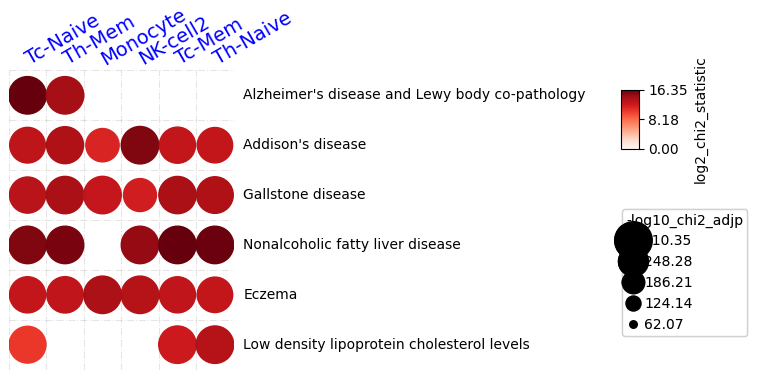

In [14]:
# left_ha = HeatmapAnnotation(
#                           CellType=anno_simple(df_row.CellType,cmap='Set1',
#                                            add_text=True,legend=False),
#                            axis=0,verbose=0,label_kws={'rotation':45,'horizontalalignment':'left','visible':False})
# right_ha = HeatmapAnnotation(
#                           label=anno_label(df_row.trait_description, merge=True,rotation=0,relpos=(0,0.5),arrowprops=dict(visible=True),
#                                           fontsize=12,luminance=0.8,height=2),
#                            axis=0,verbose=0,label_kws={'rotation':45,'horizontalalignment':'left'},
#                             orientation='right')

# col_ha = HeatmapAnnotation(
#                            Group=anno_simple(df_col.Group,cmap='Set1',legend=False,add_text=True,
#                                                height=4.5,colors={'Group1':'yellowgreen','Group2':'orange'}),
#                            CellClass=anno_simple(df_col.CellType,cmap='Set1',legend=False,add_text=True,
#                                                  height=4.5),
#                            verbose=0,label_side='right',label_kws={'horizontalalignment':'left'})

plt.figure(figsize=(3, 3.5))
cm = DotClustermapPlotter(data=data, x='Name',y='trait_description',value='log2_chi2_statistic',
                          s='-log10_chi2_adjp',c='log2_chi2_statistic',cmap='Reds',
                          row_cluster=False,col_cluster=True,#hue='Group',
                          #cmap={'Group1':'Greens','Group2':'OrRd'},
                          # vmin=-1*np.log10(0.1),vmax=-1*np.log10(1e-20),
                          #colors={'Group1':'yellowgreen','Group2':'orange'},
                          #marker={'Group1':'*','Group2':'$\\ast$'},
                          marker='o',y_order=keep_traits,
                          show_rownames=True,show_colnames=True,row_dendrogram=False,
                          col_names_side='top',#row_names_side='right',
                          xticklabels_kws={'labelrotation': 30, 'labelcolor': 'blue','labelsize':14},
                          #top_annotation=col_ha,
                          # left_annotation=left_ha,right_annotation=right_ha,
                          spines=False,
                          # row_split=df_row.CellType, row_split_gap=1,
                          # col_split=df_col.Group,col_split_gap=0.5,
                          verbose=1,legend_gap=15,grid='minor',
                          #dot_legend_marker='*',
                          # xlabel=Group,xlabel_side="top",
                          # xlabel_kws=dict(labelpad=8,fontweight='bold'),
                          # xlabel_bbox_kws=dict(facecolor=facecolor)
                         )
plt.savefig(f"{outdir}/dotHeatmap.pdf",bbox_inches='tight')

## Plot heatmap for PP4

In [151]:
data=pd.read_csv("coloc_results.tsv",sep='\t',index_col=0)
data=data.loc[data.PP4>=0.5]
# data=data.loc[:,['dmr_id','phe2','n_snps','snp','snp2','Name','trait_description','PP4']]
data

,snp,chrom,position,MAF,dmr_id,pvalues,phe2,pvalue2,snp2,n_snps,...,Name,file,beta2,varbeta2,pvalues2,trait_description,ontology_mapping,sample_size,n_case,n_control
dmr938063,rs34950321,chr5,76668682.0,0.3430,dmr938063,9.025980e-35,GCST90002361,1.181338e-31,rs34950321,23.0,...,Monocyte,Monocyte.quant.no_beta.txt,NaN,NaN,NaN,Platelet count,EFO_0004309,721201.0,NaN,NaN
dmr846958,rs2606736,chr3,11358775.0,0.5000,dmr846958,9.523610e-25,GCST90000064,5.500000e-15,rs2606736,1.0,...,Th-Naive,Th-Naive.quant.no_beta.txt,NaN,NaN,NaN,Hypertension,EFO_0000537,810865.0,NaN,NaN
dmr1668545,rs2606736,chr3,11358775.0,0.5000,dmr1668545,3.502970e-21,GCST90000064,5.500000e-15,rs2606736,1.0,...,Tc-Mem,Tc-Mem.quant.no_beta.txt,NaN,NaN,NaN,Hypertension,EFO_0000537,810865.0,NaN,NaN
dmr552486,rs112802399,chr17,78134906.0,0.5000,dmr552486,2.955510e-20,GCST90002372,1.418213e-13,rs112802399,1.0,...,Tc-Naive,Tc-Naive.quant.no_beta.txt,NaN,NaN,NaN,Red cell distribution width,EFO_0005192,563352.0,NaN,NaN
dmr759136,rs2606736,chr3,11358775.0,0.5000,dmr759136,1.350330e-19,GCST90000064,5.500000e-15,rs2606736,1.0,...,Th-Mem,Th-Mem.quant.no_beta.txt,NaN,NaN,NaN,Hypertension,EFO_0000537,810865.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dmr2659510,rs144044117,chr8,118907319.0,0.4945,dmr2659510,1.021300e-04,GCST90002302,3.025296e-11,rs144044117,8.0,...,Tc-Mem,Tc-Mem.quant.no_beta.txt,NaN,NaN,NaN,Eosinophil counts,EFO_0004842,583850.0,NaN,NaN
dmr393357,rs341376,chr15,60823522.0,0.0055,dmr393357,1.566010e-13,GCST90002302,1.637049e-09,rs341376,8.0,...,Th-Mem,Th-Mem.quant.no_beta.txt,NaN,NaN,NaN,Eosinophil counts,EFO_0004842,583850.0,NaN,NaN
dmr2237947,rs16891725,chr6,26478922.0,0.4825,dmr2237947,7.215330e-04,GCST90011871,3.226000e-47,rs16891725,7.0,...,Tc-Mem,Tc-Mem.cc.no_beta.txt,NaN,NaN,NaN,Addison's disease,Orphanet_101960,5320.0,1223.0,4097.0
dmr598608,rs12981369,chr19,1066929.0,0.4950,dmr598608,9.564540e-05,GCST90002372,2.427612e-12,rs12981369,8.0,...,Tc-Naive,Tc-Naive.quant.no_beta.txt,NaN,NaN,NaN,Red cell distribution width,EFO_0005192,563352.0,NaN,NaN


In [152]:
keep_traits=[
            "Alzheimer's disease and Lewy body co-pathology",
            "Addison's disease",
            'Gallstone disease',
            'Nonalcoholic fatty liver disease',
            # 'Eosinophil counts',
            # 'Platelet count',
             'Red blood cell count',
             # 'Monocyte count',
            # 'White blood cell count',
            # 'platelet_count',
             'Eczema',
             'Creatinine levels',
             'Low density lipoprotein cholesterol levels',
             'Serum levels of protein LILRB1',
             'Aspartate aminotransferase levels',
             'Gamma glutamyl transferase levels',
             'Serum levels of protein HTATIP2',
             'Uric acid levels',
             'Blood urea nitrogen levels',
             'Albumin levels',
             'High density lipoprotein cholesterol levels',
             'Serum levels of protein RARRES1',
             'Peak_expiratory_flow_PEF',
            'Alanine aminotransferase levels',
             'Gamma-glutamyl hydrolase measurement',
             'Serum levels of protein ANK2','Serum levels of protein C2',
             # 'Neuronal pentraxin receptor',
             # 'Complement C1r subcomponent-like protein measurement',
             'DNA methylation PhenoAge acceleration',
             'Total bilirubin levels',
            # 'Alkaline_phosphatase',
            'Left ventricular end-diastolic volume','BAFF-R on memory B cell',
            'Right ventricular peak atrial filling rate','Systolic blood pressure','Diastolic blood pressure',
            ]

In [153]:
data=data.loc[data.trait_description.isin(keep_traits)]

In [154]:
data['ColID']=data.Name.map(str)+'||'+data.dmr_id.map(str)
data1=data.pivot_table(index='trait_description',columns='ColID',values='PP4',aggfunc=np.max)
data1

/tmp/ipykernel_498167/522951531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ColID']=data.Name.map(str)+'||'+data.dmr_id.map(str)
/tmp/ipykernel_498167/522951531.py:2: FutureWarning: The provided callable <function max at 0x7fc1fc517670> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  data1=data.pivot_table(index='trait_description',columns='ColID',values='PP4',aggfunc=np.max)


ColID,Monocyte||dmr1162074,Monocyte||dmr1231349,Monocyte||dmr1231473,Monocyte||dmr132538,Monocyte||dmr185740,Monocyte||dmr197598,Monocyte||dmr283095,Monocyte||dmr285545,Monocyte||dmr285547,Monocyte||dmr339923,...,Th-Naive||dmr913500,Th-Naive||dmr913509,Th-Naive||dmr913511,Th-Naive||dmr92283,Th-Naive||dmr926768,Th-Naive||dmr926772,Th-Naive||dmr926787,Th-Naive||dmr926808,Th-Naive||dmr926810,Th-Naive||dmr989821
trait_description,,,,,,,,,,,,,,,,,,,,,
Addison's disease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.947147,0.970831,0.969571,0.978233,0.966605,NaN
Alanine aminotransferase levels,NaN,0.835272,0.700743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albumin levels,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alzheimer's disease and Lewy body co-pathology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aspartate aminotransferase levels,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Serum levels of protein LILRB1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Serum levels of protein RARRES1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.991808,0.991725,0.638078,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Systolic blood pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
df_col=data1.columns.to_frame()
df_col['CellType']=df_col.ColID.apply(lambda x:x.split('||')[0])
df_col

,ColID,CellType
ColID,,
Monocyte||dmr1162074,Monocyte||dmr1162074,Monocyte
Monocyte||dmr1231349,Monocyte||dmr1231349,Monocyte
Monocyte||dmr1231473,Monocyte||dmr1231473,Monocyte
Monocyte||dmr132538,Monocyte||dmr132538,Monocyte
Monocyte||dmr185740,Monocyte||dmr185740,Monocyte
...,...,...
Th-Naive||dmr926772,Th-Naive||dmr926772,Th-Naive
Th-Naive||dmr926787,Th-Naive||dmr926787,Th-Naive
Th-Naive||dmr926808,Th-Naive||dmr926808,Th-Naive


In [156]:
df_row=data1.index.to_frame()
row_colors={}
for label in df_row.trait_description.unique():
    if label in ["Addison's disease"]: #"Alzheimer's disease and Lewy body co-pathology"
        row_colors[label]='red'
    else:
        row_colors[label]='black'
df_row

,trait_description
trait_description,
Addison's disease,Addison's disease
Alanine aminotransferase levels,Alanine aminotransferase levels
Albumin levels,Albumin levels
Alzheimer's disease and Lewy body co-pathology,Alzheimer's disease and Lewy body co-pathology
Aspartate aminotransferase levels,Aspartate aminotransferase levels
...,...
Serum levels of protein LILRB1,Serum levels of protein LILRB1
Serum levels of protein RARRES1,Serum levels of protein RARRES1
Systolic blood pressure,Systolic blood pressure


Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..


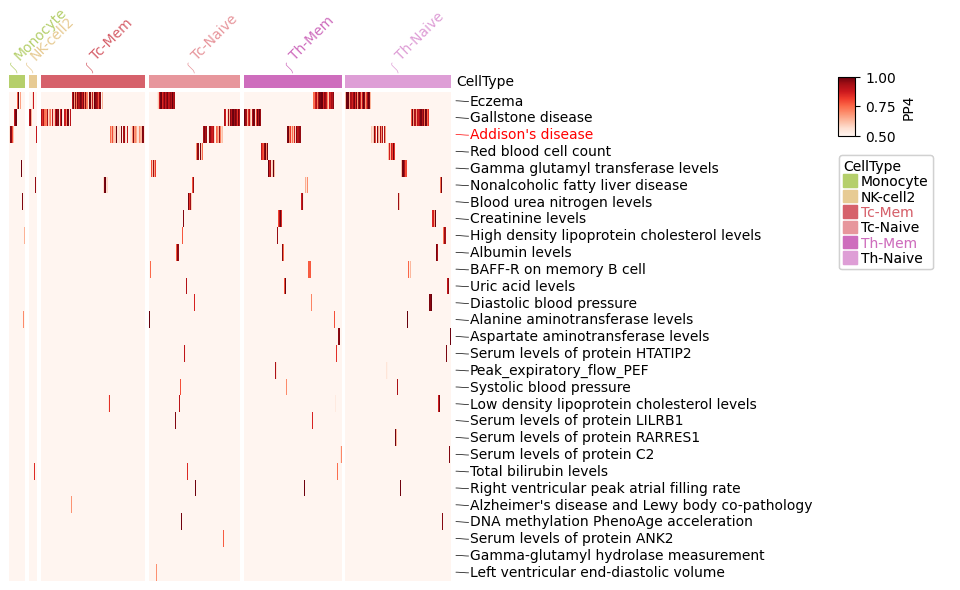

In [157]:
from matplotlib.colors import rgb2hex
import seaborn as sns
color_plate = sns.color_palette("tab20b")
color_plate = [rgb2hex(x) for x in color_plate]

cell2color = {'B-Mem': color_plate[2],
             'B-Naive': color_plate[3],
             'Monocyte': color_plate[6],
             'Monocyte1': color_plate[7],
             'NK-cell1': color_plate[10],
             'NK-cell2': color_plate[11],
             'Tc-Mem': color_plate[14],
             'Tc-Naive': color_plate[15],
             'Th-Mem': color_plate[18],
             'Th-Naive': color_plate[19]}
keys=list(cell2color.keys())
for ct in keys:
    if ct not in df_col.CellType.unique():
        del cell2color[ct]



col_ha = HeatmapAnnotation(
            label=anno_label(df_col.CellType,cmap='nature6_2',colors=cell2color,
                             merge=True,rotation=45,extend=True,
                            adjust_color=True,luminance=0.75),
            CellType=anno_simple(df_col.CellType,add_text=False,colors=cell2color,),axis=1,
            verbose=0)
row_ha=HeatmapAnnotation(
            label=anno_label(df_row.trait_description,colors=row_colors,
                             merge=True,extend=True,relpos=(0,0.45),
                            adjust_color=True,luminance=0.75),
            axis=0,orientation='right',
            verbose=0)

plt.figure(figsize=(6, 6))
cm = ClusterMapPlotter(
        data=data1.fillna(0), top_annotation=col_ha,right_annotation=row_ha,
        col_cluster=True,row_cluster=True,
        col_split=df_col.CellType,
        vmin=0.5,vmax=1,
        col_split_gap=1,
        label='PP4',col_split_order=sorted(df_col.CellType.unique().tolist()),
        # row_dendrogram=True,col_dendrogram=False,row_dendrogram_size=15,
        show_rownames=False,show_colnames=False,yticklabels=True,
        tree_kws={'row_cmap': 'Set1'},verbose=1,legend_gap=5,
        cmap='Reds',legend_width=30,
        xticklabels_kws=dict(labelrotation=90,labelcolor='blue',labelsize=14,grid_color='red',bottom=True))
plt.savefig("PP4_heatmap.pdf", bbox_inches='tight')
plt.show()

## Plot Addison's disease

In [109]:
data=pd.read_csv("coloc_results.tsv",sep='\t',index_col=0)
data=data.loc[data.trait_description=="Addison's disease",['snp','dmr_id','snp2','n_snps','Name','MAF','PP4']]
data['ColID']=data.Name.map(str)+'||'+data.dmr_id.map(str)
data

,snp,dmr_id,snp2,n_snps,Name,MAF,PP4,ColID
dmr806478,rs11203203,dmr806478,rs11203203,2.0,Tc-Naive,0.5000,9.991029e-01,Tc-Naive||dmr806478
dmr734503,rs231800,dmr734503,rs231800,22.0,Th-Naive,0.0040,9.974118e-01,Th-Naive||dmr734503
dmr734506,rs2162606,dmr734506,rs2162606,22.0,Th-Naive,0.3110,9.967364e-01,Th-Naive||dmr734506
dmr2244807,rs3134932,dmr2244807,rs3134932,74.0,Tc-Mem,0.5000,9.957175e-01,Tc-Mem||dmr2244807
dmr729910,rs2162606,dmr729910,rs2162606,22.0,Tc-Naive,0.3110,9.954260e-01,Tc-Naive||dmr729910
...,...,...,...,...,...,...,...,...
dmr2244110,rs1800630,dmr2244110,rs1800630,213.0,Tc-Mem,0.5000,5.998550e-14,Tc-Mem||dmr2244110
dmr1117913,rs9332741,dmr1117913,rs9332741,165.0,Tc-Naive,0.5000,1.145456e-14,Tc-Naive||dmr1117913
dmr2245133,rs16822616,dmr2245133,rs16822616,1066.0,Tc-Mem,0.4995,8.556031e-15,Tc-Mem||dmr2245133
dmr1117660,rs1800630,dmr1117660,rs1800630,223.0,Tc-Naive,0.5000,4.482765e-15,Tc-Naive||dmr1117660


In [110]:
from upsetplot import from_contents

df1 = from_contents(
    data.groupby('Name').snp2.apply(lambda x:x.unique().tolist()).to_dict()
)
df1

/anvil/projects/x-mcb130189/Wubin/Software/miniconda3/envs/m3c/lib/python3.9/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)


id
B-Naive Monocyte NK-cell2 Tc-Mem Tc-Naive Th-Mem Th-Naive            
True    True     False    False  False    False  False      rs3129699
        False    False    True   False    False  True        rs241441
False   True     False    False  True     False  False     rs11571316
                                 False    False  False      rs9848016
                                                 False      rs6940116
...                                                               ...
        False    False    False  False    False  True       rs2523962
                                                 True       rs3130418
                                                 True       rs1736938
                                                 True      rs28895195
                                                 True        rs198838

[1692 rows x 1 columns]

/anvil/projects/x-mcb130189/Wubin/Software/miniconda3/envs/m3c/lib/python3.9/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/anvil/projects/x-mcb130189/Wubin/Software/miniconda3/envs/m3c/lib/python3.9/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work 

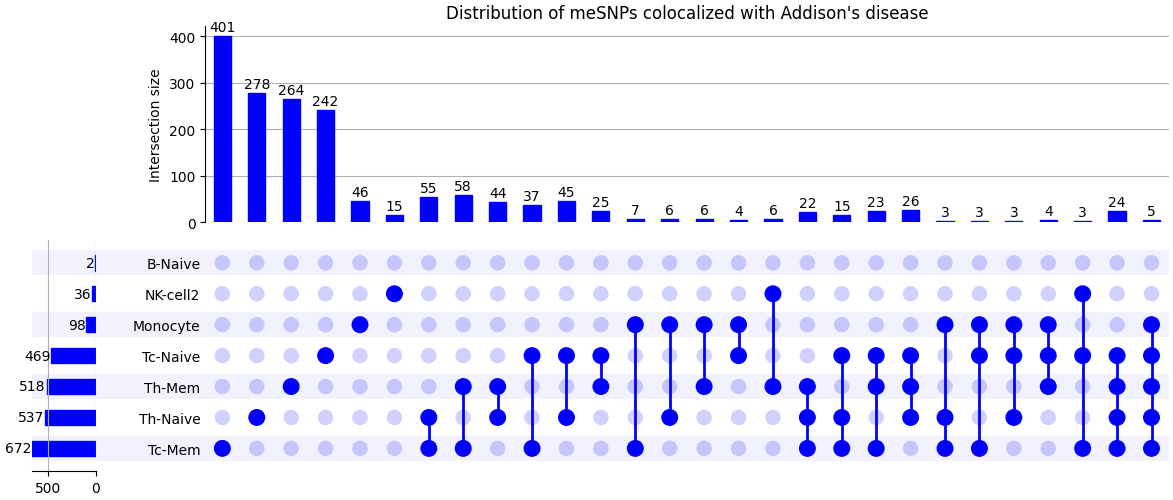

In [111]:
import upsetplot
# plt.figure(figsize=(5,3))
upsetplot.plot(df1,show_counts=True,facecolor='blue',min_subset_size=3) #shading_color='wheat'
ax=plt.gca()
ax.set_title("Distribution of meSNPs colocalized with Addison's disease")
plt.savefig("upsetplot.pdf",bbox_inches='tight')

In [81]:
df1=data.loc[:,['snp','Name']].value_counts().unstack().reset_index() #.stack(level=1)
cols=df1.columns.tolist()[2:]
# df1.groupby(cols).snp.count()
df1

Name,snp,B-Naive,Monocyte,NK-cell2,Tc-Mem,Tc-Naive,Th-Mem,Th-Naive
0,rs10046213,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,rs1015166,NaN,1.0,NaN,1.0,1.0,NaN,NaN
2,rs10214440,NaN,NaN,NaN,1.0,NaN,3.0,NaN
3,rs10214634,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,rs1029239,NaN,NaN,NaN,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...
1687,rs9848016,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1688,rs9851967,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1689,rs9864529,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1690,rs994321,NaN,NaN,NaN,NaN,NaN,NaN,1.0


<Axes: xlabel='snp', ylabel='count'>

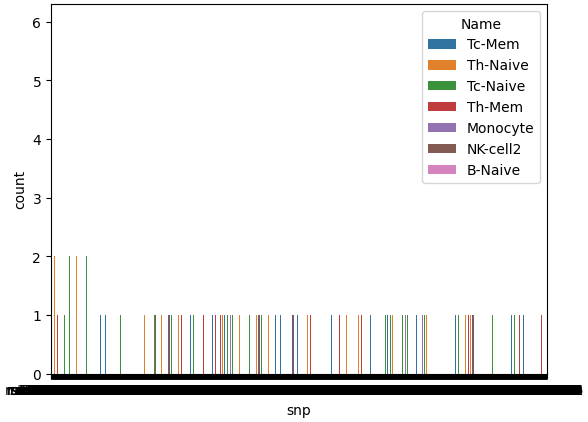

In [48]:
sns.barplot(data.loc[:,['snp','Name']].value_counts().reset_index(),x='snp',y='count',hue='Name')

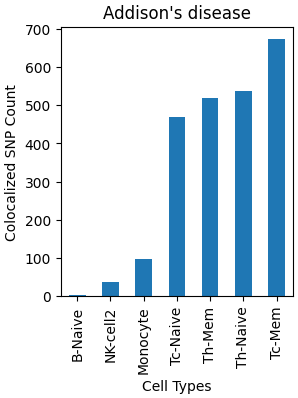

In [31]:
plt.figure(figsize=(3,3.5))
ax=data.groupby('Name').snp.apply(lambda x:x.nunique()).sort_values().plot(kind='bar')
ax.set_ylabel("Colocalized SNP Count")
ax.set_xlabel("Cell Types")
ax.set_title("Addison's disease")
plt.savefig("Addison_disease_snp_count_barplot.pdf", bbox_inches='tight')
plt.show()

In [4]:
data1=data.pivot(index='snp',columns='ColID',values='PP4').fillna(0)
data1

ColID,B-Naive||dmr657771,B-Naive||dmr659111,Monocyte||dmr1021350,Monocyte||dmr654562,Monocyte||dmr825696,Monocyte||dmr994583,Monocyte||dmr994740,Monocyte||dmr994831,Monocyte||dmr995022,Monocyte||dmr995148,...,Th-Naive||dmr60843,Th-Naive||dmr734501,Th-Naive||dmr734503,Th-Naive||dmr734506,Th-Naive||dmr734539,Th-Naive||dmr926768,Th-Naive||dmr926772,Th-Naive||dmr926787,Th-Naive||dmr926808,Th-Naive||dmr926810
snp,,,,,,,,,,,,,,,,,,,,,
rs10046213,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
rs1015166,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
rs10214440,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
rs10214634,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
rs1029239,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rs9848016,0.0,0.0,0.0,0.0,0.96072,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
rs9851967,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
rs9864529,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.970831,0.0,0.0,0.0


In [5]:
df_row=data.loc[:,['snp','MAF']].drop_duplicates()
df_row

,snp,MAF
dmr806478,rs11203203,0.5000
dmr734503,rs231800,0.0040
dmr734506,rs2162606,0.3110
dmr2244807,rs3134932,0.5000
dmr1118825,rs910320,0.5000
...,...,...
dmr1117930,rs144585235,0.5000
dmr1114869,rs7743465,0.5000
dmr1001740,rs6456784,0.5000
dmr2245133,rs16822616,0.4995


In [6]:
df_col=data1.columns.to_frame()
df_col['CellType']=df_col.ColID.apply(lambda x:x.split('||')[0])
df_col

,ColID,CellType
ColID,,
B-Naive||dmr657771,B-Naive||dmr657771,B-Naive
B-Naive||dmr659111,B-Naive||dmr659111,B-Naive
Monocyte||dmr1021350,Monocyte||dmr1021350,Monocyte
Monocyte||dmr654562,Monocyte||dmr654562,Monocyte
Monocyte||dmr825696,Monocyte||dmr825696,Monocyte
...,...,...
Th-Naive||dmr926768,Th-Naive||dmr926768,Th-Naive
Th-Naive||dmr926772,Th-Naive||dmr926772,Th-Naive
Th-Naive||dmr926787,Th-Naive||dmr926787,Th-Naive


ERROR! Session/line number was not unique in database. History logging moved to new session 3322
Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..


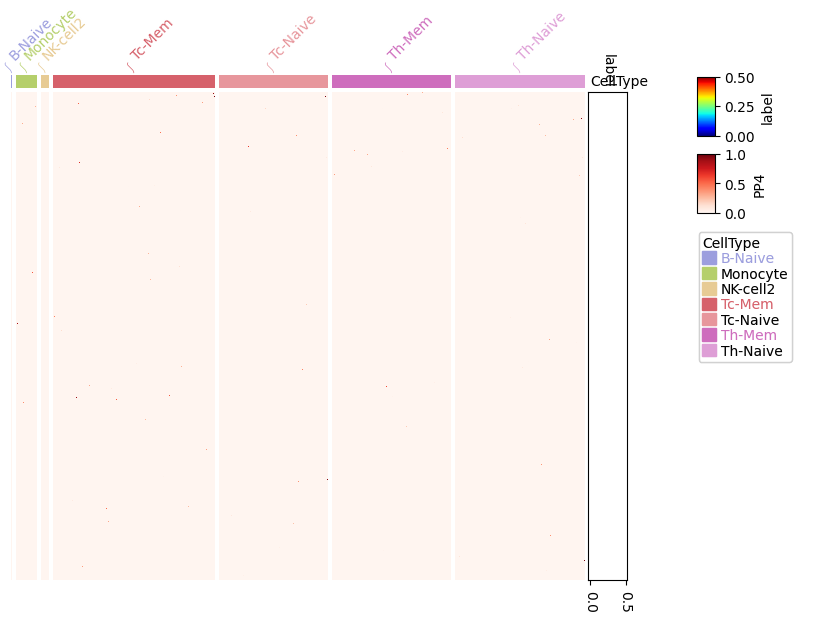

In [7]:
from matplotlib.colors import rgb2hex
import seaborn as sns
color_plate = sns.color_palette("tab20b")
color_plate = [rgb2hex(x) for x in color_plate]

cell2color = {'B-Mem': color_plate[2],
             'B-Naive': color_plate[3],
             'Monocyte': color_plate[6],
             'Monocyte1': color_plate[7],
             'NK-cell1': color_plate[10],
             'NK-cell2': color_plate[11],
             'Tc-Mem': color_plate[14],
             'Tc-Naive': color_plate[15],
             'Th-Mem': color_plate[18],
             'Th-Naive': color_plate[19]}
keys=list(cell2color.keys())
for ct in keys:
    if ct not in df_col.CellType.unique():
        del cell2color[ct]


col_ha = HeatmapAnnotation(
            label=anno_label(df_col.CellType,colors=cell2color,
                             merge=True,rotation=45,extend=True,
                            adjust_color=True,luminance=0.75),
            CellType=anno_simple(df_col.CellType,add_text=False,colors=cell2color,),axis=1,
            verbose=0)

row_ha=HeatmapAnnotation(
            label=anno_barplot(df_row.MAF,cmap='jet',linewidth=0.1),
            axis=0,orientation='right',
            verbose=0)

plt.figure(figsize=(8, 6))
cm = ClusterMapPlotter(
        data=data1.fillna(0), top_annotation=col_ha,right_annotation=row_ha,
        col_cluster=False,row_cluster=False,
        col_split=df_col.CellType,
        vmin=0,vmax=1,
        col_split_gap=1,
        label='PP4',col_split_order=sorted(df_col.CellType.unique().tolist()),
        # row_dendrogram=True,col_dendrogram=False,row_dendrogram_size=15,
        show_rownames=False,show_colnames=False,yticklabels=True,
        tree_kws={'row_cmap': 'Set1'},verbose=1,legend_gap=5,
        cmap='Reds',legend_width=30)
plt.savefig("Addison_disease_PP4_heatmap.pdf", bbox_inches='tight')
plt.show()

In [9]:
df_row.dtypes

snp     object
MAF    float64
dtype: object